# Linear Discriminant Analysis (LDA)

## Dependency

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)
plt.style.use('default')

## Parameter

In [31]:
N_SAMPLES = 1000
# N_FEATURES = 10
N_FEATURES = 2
# N_INFORMATIVE = 10
N_INFORMATIVE = 2
N_REDUNDANT = 0
N_CLASSES = 2
RANDOM_STATE = 0

N_SPLITS = 10
N_REPEATS = 3

## Data

In [48]:
X, y = make_classification(
    n_samples=N_SAMPLES,
    n_features=N_FEATURES,
    n_informative=N_INFORMATIVE,
    n_redundant=N_REDUNDANT,
    n_classes=N_CLASSES,
    random_state=RANDOM_STATE
)

In [19]:
print(X.shape, y.shape)

(1000, 2) (1000,)


In [20]:
pd.DataFrame(X).head()

,0,1
0,-1.441012,-0.780767
1,0.001605,1.416898
2,-0.963649,1.030862
3,-2.298670,2.381434
4,-0.300886,0.744814


In [21]:
pd.DataFrame(y).head()

,0
0,0
1,1
2,1
3,1
4,1


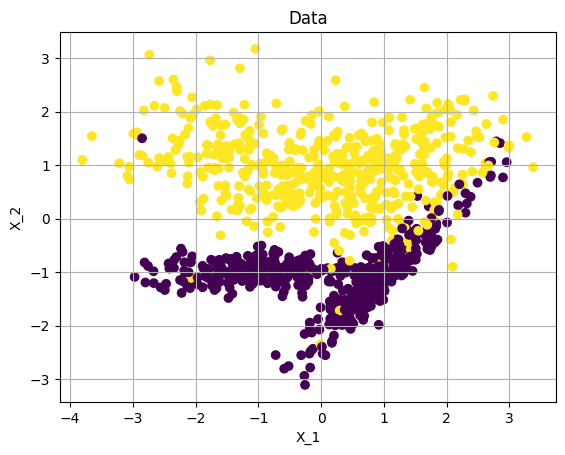

In [29]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Data')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.grid()
plt.show()

## Model

In [33]:
model = LinearDiscriminantAnalysis()

cv = RepeatedStratifiedKFold(n_splits=N_SPLITS, n_repeats=N_REPEATS, random_state=RANDOM_STATE)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)

In [36]:
print(f'Mean accuracy: {np.mean(scores):.1%}, Std accuracy: {np.std(scores):.1f}')

Mean accuracy: 94.2%, Std accuracy: 0.0


## Prediction

In [39]:
model.fit(X, y)

LinearDiscriminantAnalysis()

In [57]:
x1s = []
x2s = []
for i in np.linspace(-4, 4, 100):
    for j in np.linspace(-3, 3, 100):
        probs = model.predict_proba([[i, j]])
                
        if probs[0][0] > 0.45 and probs[0][1] > 0.5:
            x1s.append(i)
            x2s.append(j)

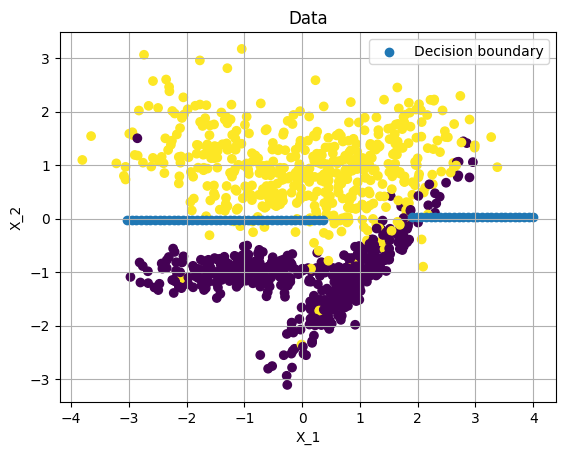

In [61]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(x1s, x2s, label='Decision boundary')
plt.title('Data')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.legend()
plt.grid()
plt.show()